# Esports Earnings 

Esports is one of the fastest growing sources of entertainment and past time. I am curious to see which games and genres havebeen earning the most revenue. Also I want to see what esports teams have been earning the most per tournament and further break that down by the different players and the continent they're from.

In [1]:
# ImportData Analysis environment

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Read in main data sets 
tdf = pd.read_csv(r'../input/esports-earnings-for-players-teams-by-game/highest_earning_teams.csv') #teams data frame


## Explore DataFrame

In [3]:
#overbiew of data frame
tdf.head(10)

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.00,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.50,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.50,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.50,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.00,6,Overwatch,First-Person Shooter
5,856,Vancouver Titans,950000.00,4,Overwatch,First-Person Shooter
6,769,Shanghai Dragons,755000.00,5,Overwatch,First-Person Shooter
7,774,Los Angeles Gladiators,709605.19,13,Overwatch,First-Person Shooter
8,861,Atlanta Reign,596098.00,9,Overwatch,First-Person Shooter
9,770,Los Angeles Valiant,535000.00,6,Overwatch,First-Person Shooter


In [4]:
# check data types for any issues
tdf.dtypes
# Prize money should be an integer rather than float

TeamId                int64
TeamName             object
TotalUSDPrize       float64
TotalTournaments      int64
Game                 object
Genre                object
dtype: object

In [5]:
tdf['TotalUSDPrize'] = tdf['TotalUSDPrize'].astype('int64')

In [6]:
# check for and delete any rows with null values
tdf.isnull().value_counts() #none

TeamId  TeamName  TotalUSDPrize  TotalTournaments  Game   Genre
False   False     False          False             False  False    928
dtype: int64

In [7]:
# view each unique game in the dataset
tdf['Game'].unique()

array(['Overwatch', 'Starcraft II', 'League of Legends', 'Fortnite',
       'Counter-Strike: Global Offensive', 'Dota 2', 'PUBG',
       'Heroes of the Storm', 'Hearthstone', 'Arena of Valor'],
      dtype=object)

In [8]:
# now to view unique teams
tdf['TeamName'].unique

<bound method Series.unique of 0        San Francisco Shock
1            London Spitfire
2         New York Excelsior
3        Philadelphia Fusion
4              Seoul Dynasty
               ...          
923           Rex Regum Qeon
924                 Alliance
925          Marines Esports
926    British National Team
927    Swedish National Team
Name: TeamName, Length: 928, dtype: object>

### Top Ten Teams (Total USD Prize$)


In [9]:
tdf.nlargest(10, 'TotalUSDPrize')

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
500,419,OG,33810636,68,Dota 2,Multiplayer Online Battle Arena
501,102,Team Liquid,22967431,96,Dota 2,Multiplayer Online Battle Arena
502,101,Evil Geniuses,19988670,115,Dota 2,Multiplayer Online Battle Arena
503,210,Newbee,13523736,98,Dota 2,Multiplayer Online Battle Arena
504,211,Team Secret,11492345,79,Dota 2,Multiplayer Online Battle Arena
505,169,Vici Gaming,11182792,121,Dota 2,Multiplayer Online Battle Arena
506,227,LGD Gaming,10072755,79,Dota 2,Multiplayer Online Battle Arena
507,185,Virtus.pro,10037385,125,Dota 2,Multiplayer Online Battle Arena
508,507,Wings Gaming,9739247,24,Dota 2,Multiplayer Online Battle Arena
509,623,Paris Saint-Germain Esports,9066946,27,Dota 2,Multiplayer Online Battle Arena


This table also tells us that the top ten earning teams all play the game 'DOTA 2' in the 'Multiplayer Online Battle Arena' Genre

In [10]:
# view total prize earnings by game in bar plot
Games_earnings = tdf.groupby(['Game'])['TotalUSDPrize'].sum().sort_values(ascending=False).reset_index()
Games_earnings

,Game,TotalUSDPrize
0,Dota 2,220282731
1,Counter-Strike: Global Offensive,84853899
2,League of Legends,64665517
3,Fortnite,34661313
4,Starcraft II,27856100
5,Overwatch,20465245
6,PUBG,16714974
7,Hearthstone,10864511
8,Heroes of the Storm,10710498
9,Arena of Valor,9969134


Text(0.5, 0, 'Games')

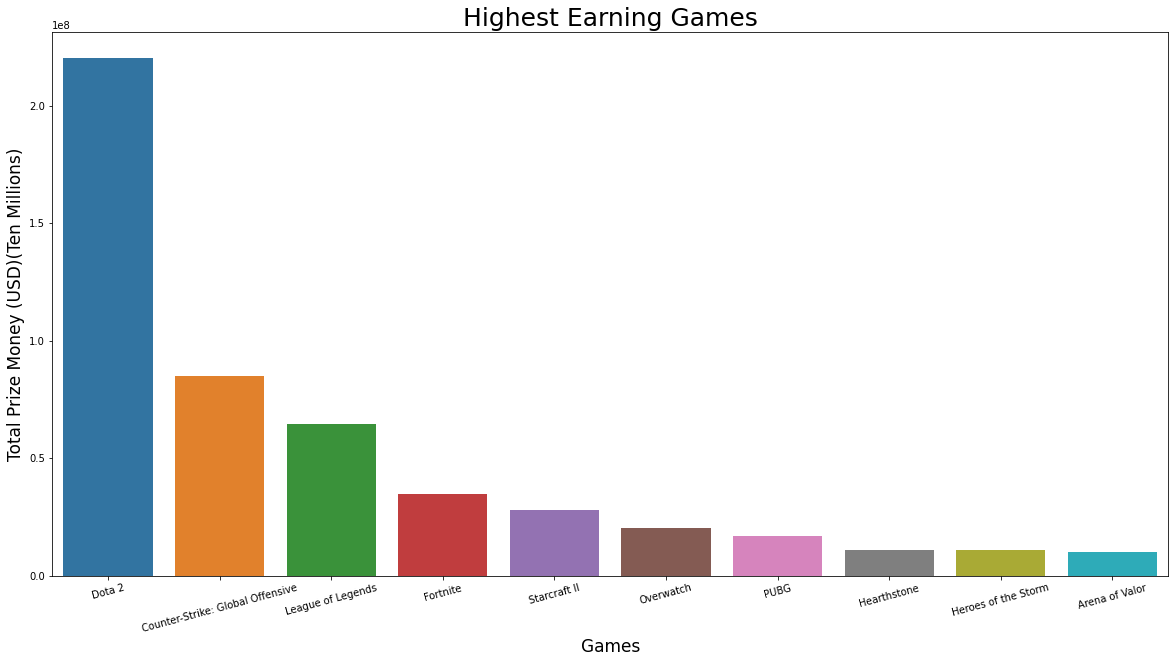

In [11]:
#view in bar chart
plt.figure(figsize=(20,10))
sns.barplot(x=Games_earnings['Game'], y=Games_earnings['TotalUSDPrize'])
plt.title('Highest Earning Games', size=25)
plt.ylabel('Total Prize Money (USD)(Ten Millions)', size = 17)
plt.xticks(rotation=15)
plt.xlabel('Games', size=17)


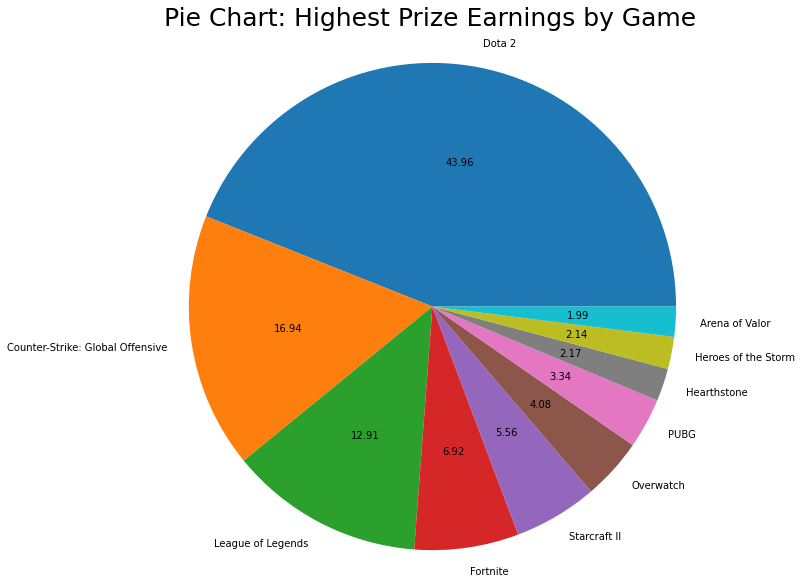

In [12]:
#view pie chart
plt.figure(figsize=(12,10))
plt.pie(Games_earnings['TotalUSDPrize'], labels=Games_earnings['Game'], autopct='%.2f')
plt.title('Pie Chart: Highest Prize Earnings by Game', size = 25)
plt.axis('equal')
plt.show()

### Tournament Amounts

In [13]:
Tourneys = tdf.groupby(['Game'])['TotalTournaments'].sum().sort_values(ascending=False).reset_index()
Tourneys

,Game,TotalTournaments
0,Starcraft II,12676
1,Counter-Strike: Global Offensive,5996
2,Dota 2,2931
3,League of Legends,2515
4,Heroes of the Storm,1663
5,Fortnite,1229
6,PUBG,828
7,Overwatch,772
8,Hearthstone,662
9,Arena of Valor,142


## Find Prize amount per Tournament for each game

In [14]:
PPT = tdf[['Game', 'TotalTournaments', 'TotalUSDPrize']].groupby('Game').sum()
PPT

,TotalTournaments,TotalUSDPrize
Game,,
Arena of Valor,142,9969134
Counter-Strike: Global Offensive,5996,84853899
Dota 2,2931,220282731
Fortnite,1229,34661313
Hearthstone,662,10864511
Heroes of the Storm,1663,10710498
League of Legends,2515,64665517
Overwatch,772,20465245
PUBG,828,16714974


In [15]:
PPT['Prize_per_tourney'] = PPT['TotalUSDPrize']/PPT['TotalTournaments']
PPT

,TotalTournaments,TotalUSDPrize,Prize_per_tourney
Game,,,
Arena of Valor,142,9969134,70205.169014
Counter-Strike: Global Offensive,5996,84853899,14151.751001
Dota 2,2931,220282731,75156.168884
Fortnite,1229,34661313,28202.858421
Hearthstone,662,10864511,16411.648036
Heroes of the Storm,1663,10710498,6440.467829
League of Legends,2515,64665517,25711.935189
Overwatch,772,20465245,26509.384715
PUBG,828,16714974,20187.166667


In [16]:
Prop_prize = PPT.groupby(['Game'])['Prize_per_tourney'].mean().sort_values(ascending=False).reset_index()
Prop_prize

,Game,Prize_per_tourney
0,Dota 2,75156.168884
1,Arena of Valor,70205.169014
2,Fortnite,28202.858421
3,Overwatch,26509.384715
4,League of Legends,25711.935189
5,PUBG,20187.166667
6,Hearthstone,16411.648036
7,Counter-Strike: Global Offensive,14151.751001
8,Heroes of the Storm,6440.467829
9,Starcraft II,2197.546545


Text(0.5, 0, 'Games')

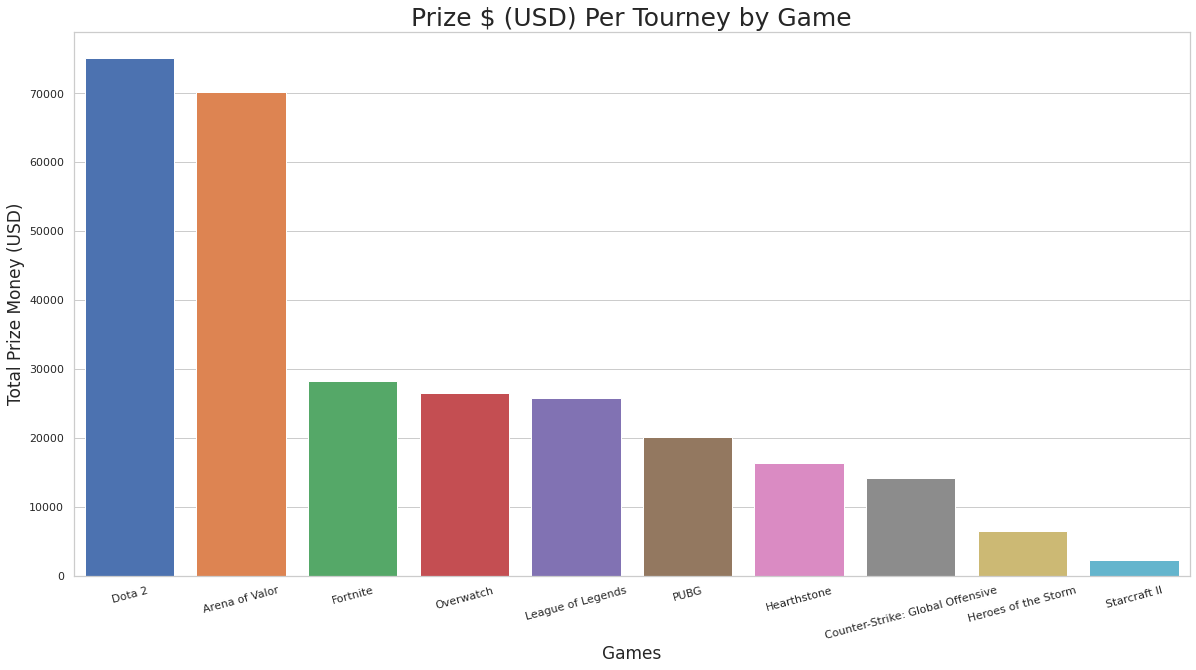

In [17]:
#view in bar chart
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=Prop_prize['Game'], y=Prop_prize['Prize_per_tourney'], saturation=1.5)
plt.title('Prize $ (USD) Per Tourney by Game', size=25)
plt.ylabel('Total Prize Money (USD)', size = 17)
plt.xticks(rotation=15)
plt.xlabel('Games', size=17)

### Prize Earnings by Team

In [18]:
# view top 20 earning teams
# Top ten earning per tourney
#top ten earning by game

In [19]:
# Top 20 earning Teams
Team_earnings = tdf.groupby(['TeamName'])['TotalUSDPrize'].sum().sort_values(ascending=False)[:20].reset_index()
Team_earnings.head(20)

,TeamName,TotalUSDPrize
0,OG,34297886
1,Team Liquid,33095689
2,Evil Geniuses,21662170
3,Virtus.pro,14393877
4,Newbee,14072156
5,Fnatic,13000707
6,Vici Gaming,12660732
7,Team Secret,11688870
8,Invictus Gaming,11515641
9,LGD Gaming,10852394


Text(0.5, 0, 'Team Name')

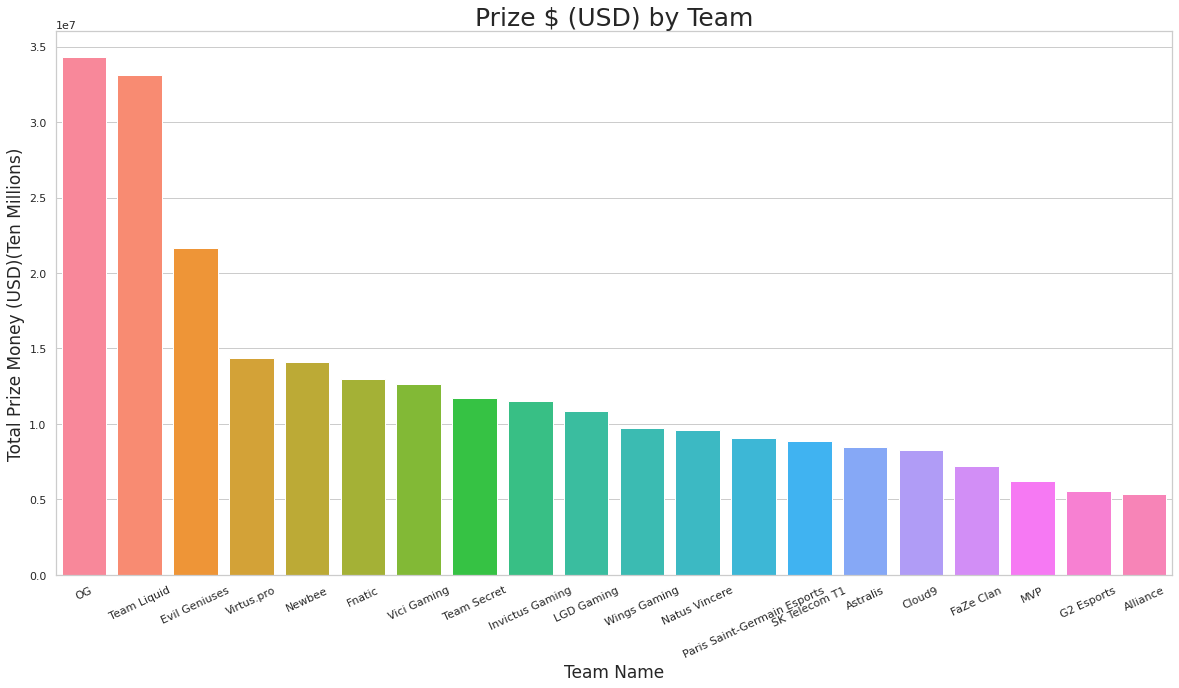

In [20]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=Team_earnings['TeamName'], y=Team_earnings['TotalUSDPrize'], saturation=1)
plt.title('Prize $ (USD) by Team', size=25)
plt.ylabel('Total Prize Money (USD)(Ten Millions)', size = 17)
plt.xticks(rotation=25)
plt.xlabel('Team Name', size=17)

In [21]:
# Find team earnings per tourney
PPTN = tdf[['TeamName', 'TotalTournaments', 'TotalUSDPrize']].groupby('TeamName').sum()
PPTN

,TotalTournaments,TotalUSDPrize
TeamName,,
(monkey) Business,2,37194
100 Thieves,55,2625388
303 Esports,5,34508
3DMAX,44,97062
4 Clovers & Lepricon,8,105298
...,...,...
mudgolems,4,59000
paiN Gaming,65,976349
vsBANDITS,1,2000


In [22]:
PPTN['Prize_per_tourney'] = PPTN['TotalUSDPrize']/PPTN['TotalTournaments']
PPTN

,TotalTournaments,TotalUSDPrize,Prize_per_tourney
TeamName,,,
(monkey) Business,2,37194,18597.000000
100 Thieves,55,2625388,47734.327273
303 Esports,5,34508,6901.600000
3DMAX,44,97062,2205.954545
4 Clovers & Lepricon,8,105298,13162.250000
...,...,...,...
mudgolems,4,59000,14750.000000
paiN Gaming,65,976349,15020.753846
vsBANDITS,1,2000,2000.000000


In [23]:
TProp_prize = PPTN.groupby(['TeamName'])['Prize_per_tourney'].mean().sort_values(ascending=False)[:20].reset_index()
TProp_prize

,TeamName,Prize_per_tourney
0,San Francisco Shock,443571.428571
1,OG,413227.542169
2,Wings Gaming,405801.958333
3,Paris Saint-Germain Esports,335812.814815
4,World Best Gaming,262500.000000
5,9z Team,250237.500000
6,Washington Justice,250000.000000
7,Vancouver Titans,237500.000000
8,Hero JiuJ,220872.200000
9,Seoul Dynasty,188333.333333


Text(0.5, 0, 'Team Name')

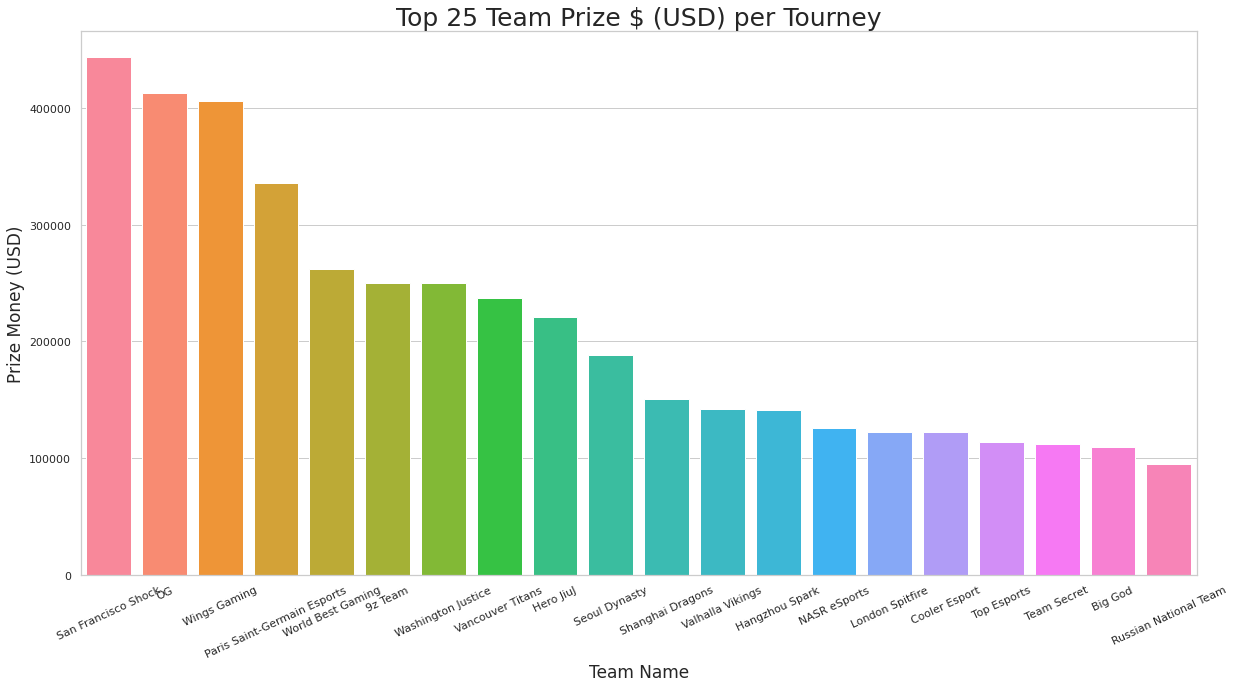

In [24]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=TProp_prize['TeamName'], y=TProp_prize['Prize_per_tourney'], saturation=1)
plt.title('Top 25 Team Prize $ (USD) per Tourney', size=25)
plt.ylabel('Prize Money (USD)', size = 17)
plt.xticks(rotation=25)
plt.xlabel('Team Name', size=17)

My friend is a big Overwatch fan so I wanmted to look at the top earning teams for strictly overwatch


In [25]:
OWL = tdf[['Game','TeamName', 'TotalTournaments', 'TotalUSDPrize']]
OWL

,Game,TeamName,TotalTournaments,TotalUSDPrize
0,Overwatch,San Francisco Shock,7,3105000
1,Overwatch,London Spitfire,13,1591136
2,Overwatch,New York Excelsior,18,1572618
3,Overwatch,Philadelphia Fusion,15,1186278
4,Overwatch,Seoul Dynasty,6,1130000
...,...,...,...,...
923,Arena of Valor,Rex Regum Qeon,2,6286
924,Arena of Valor,Alliance,1,4000
925,Arena of Valor,Marines Esports,1,3429
926,Arena of Valor,British National Team,1,2500


In [26]:
OWW = OWL.groupby('Game')
Pogg = OWW.get_group('Overwatch')[:10]
Pogg

,Game,TeamName,TotalTournaments,TotalUSDPrize
0,Overwatch,San Francisco Shock,7,3105000
1,Overwatch,London Spitfire,13,1591136
2,Overwatch,New York Excelsior,18,1572618
3,Overwatch,Philadelphia Fusion,15,1186278
4,Overwatch,Seoul Dynasty,6,1130000
5,Overwatch,Vancouver Titans,4,950000
6,Overwatch,Shanghai Dragons,5,755000
7,Overwatch,Los Angeles Gladiators,13,709605
8,Overwatch,Atlanta Reign,9,596098
9,Overwatch,Los Angeles Valiant,6,535000


Text(0.5, 0, 'Team Name')

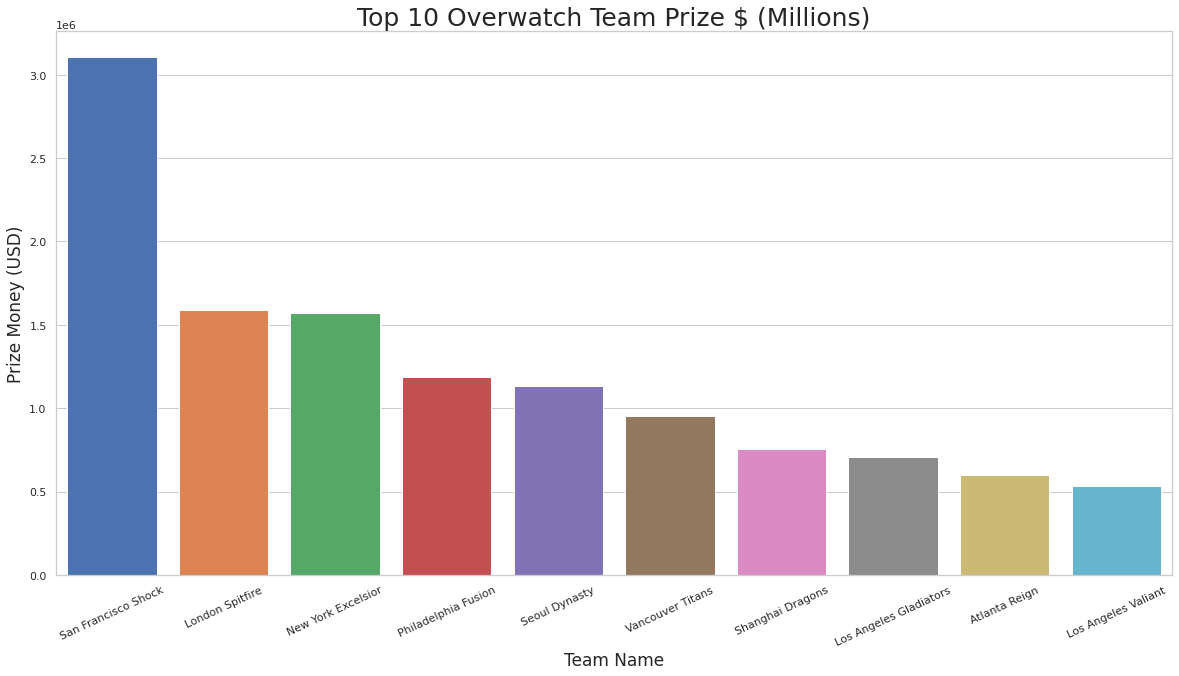

In [27]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=Pogg['TeamName'], y=Pogg['TotalUSDPrize'], saturation=1)
plt.title('Top 10 Overwatch Team Prize $ (Millions)', size=25)
plt.ylabel('Prize Money (USD)', size = 17)
plt.xticks(rotation=25)
plt.xlabel('Team Name', size=17)

In [28]:
OWL['Prize_per_tourney'] = OWL['TotalUSDPrize']/OWL['TotalTournaments']
OWL

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Game,TeamName,TotalTournaments,TotalUSDPrize,Prize_per_tourney
0,Overwatch,San Francisco Shock,7,3105000,443571.428571
1,Overwatch,London Spitfire,13,1591136,122395.076923
2,Overwatch,New York Excelsior,18,1572618,87367.666667
3,Overwatch,Philadelphia Fusion,15,1186278,79085.200000
4,Overwatch,Seoul Dynasty,6,1130000,188333.333333
...,...,...,...,...,...
923,Arena of Valor,Rex Regum Qeon,2,6286,3143.000000
924,Arena of Valor,Alliance,1,4000,4000.000000
925,Arena of Valor,Marines Esports,1,3429,3429.000000
926,Arena of Valor,British National Team,1,2500,2500.000000


In [29]:
OWW = OWL.groupby('Game')
Pogg = OWW.get_group('Overwatch').sort_values(by='TotalUSDPrize', ascending=False)[:10]
Pogg

,Game,TeamName,TotalTournaments,TotalUSDPrize,Prize_per_tourney
0,Overwatch,San Francisco Shock,7,3105000,443571.428571
1,Overwatch,London Spitfire,13,1591136,122395.076923
2,Overwatch,New York Excelsior,18,1572618,87367.666667
3,Overwatch,Philadelphia Fusion,15,1186278,79085.200000
4,Overwatch,Seoul Dynasty,6,1130000,188333.333333
5,Overwatch,Vancouver Titans,4,950000,237500.000000
6,Overwatch,Shanghai Dragons,5,755000,151000.000000
7,Overwatch,Los Angeles Gladiators,13,709605,54585.000000
8,Overwatch,Atlanta Reign,9,596098,66233.111111
9,Overwatch,Los Angeles Valiant,6,535000,89166.666667


In [30]:
OWTProp_prize = Pogg.groupby(['TeamName'])['Prize_per_tourney'].mean().sort_values(ascending=False)[:20].reset_index()
OWTProp_prize

,TeamName,Prize_per_tourney
0,San Francisco Shock,443571.428571
1,Vancouver Titans,237500.000000
2,Seoul Dynasty,188333.333333
3,Shanghai Dragons,151000.000000
4,London Spitfire,122395.076923
5,Los Angeles Valiant,89166.666667
6,New York Excelsior,87367.666667
7,Philadelphia Fusion,79085.200000
8,Atlanta Reign,66233.111111
9,Los Angeles Gladiators,54585.000000


Text(0.5, 0, 'Team Name')

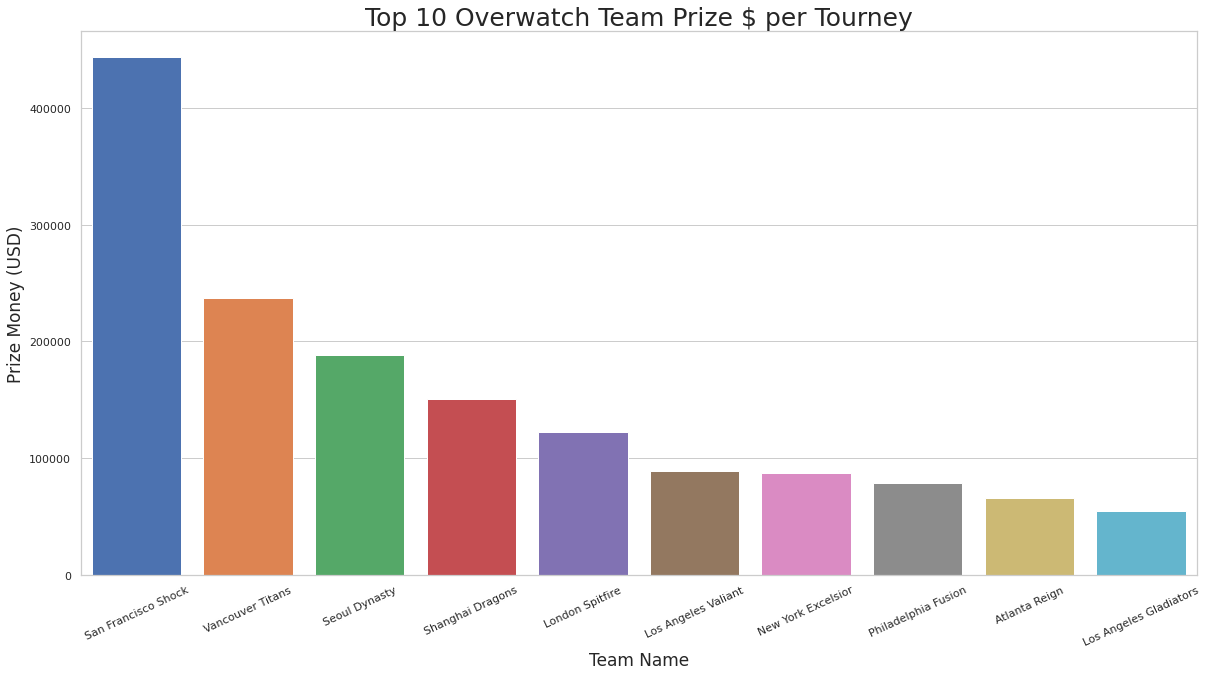

In [31]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.barplot(x=OWTProp_prize['TeamName'], y=OWTProp_prize['Prize_per_tourney'], saturation=1)
plt.title('Top 10 Overwatch Team Prize $ per Tourney', size=25)
plt.ylabel('Prize Money (USD)', size = 17)
plt.xticks(rotation=25)
plt.xlabel('Team Name', size=17)

We see San Francisco Shock had nearly double the earnings of the second highest earning team (Vancouver Titans) followed bu Seoul Dynasty in a close third.

Now to look at earnings by the genre

In [32]:
Genre_earnings = tdf.groupby(['Genre'])['TotalUSDPrize'].sum().sort_values(ascending=False).reset_index()
Genre_earnings

,Genre,TotalUSDPrize
0,Multiplayer Online Battle Arena,305627880
1,First-Person Shooter,105319144
2,Battle Royale,51376287
3,Strategy,27856100
4,Collectible Card Game,10864511


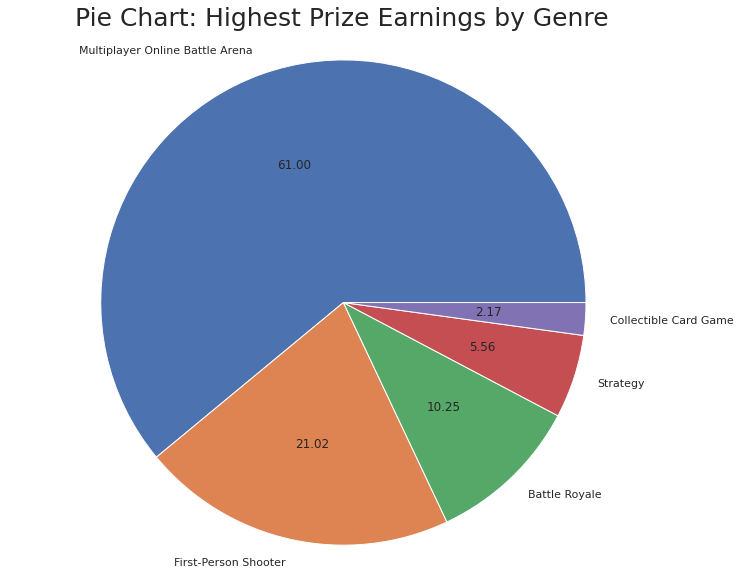

In [33]:
plt.figure(figsize=(12,10))
plt.pie(Genre_earnings['TotalUSDPrize'], labels=Genre_earnings['Genre'], autopct='%.2f')
plt.title('Pie Chart: Highest Prize Earnings by Genre', size = 25)
plt.axis('equal')
plt.show()

[Text(0.5, 1.0, 'Earnings by Genre'),
 Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'TotalUSDPrize$')]

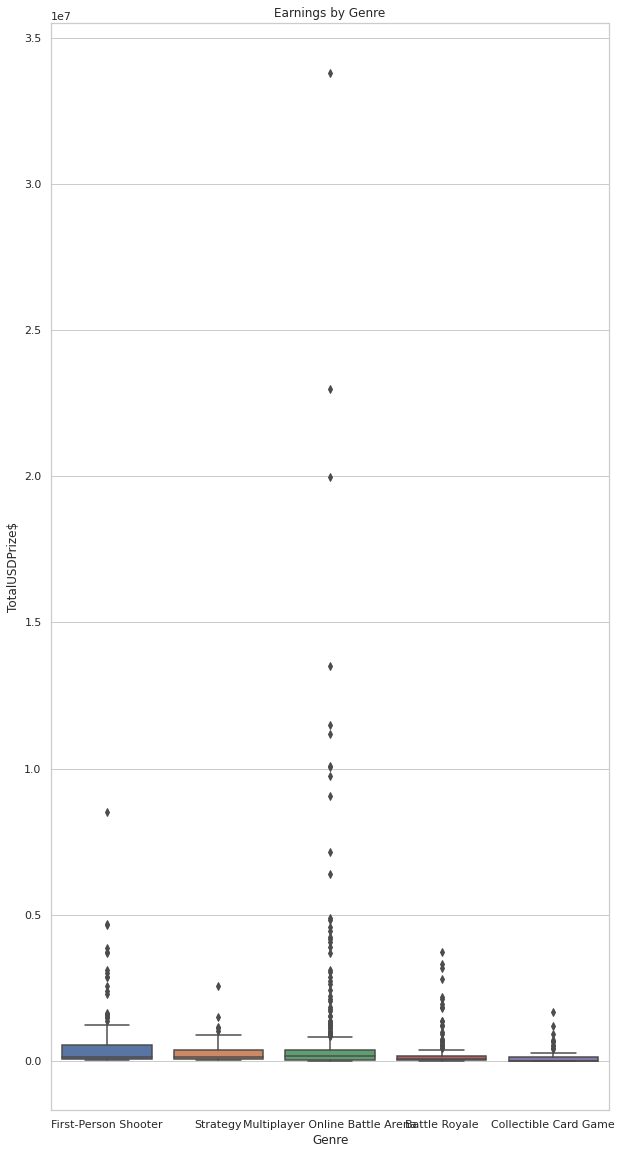

In [34]:
#lets look at this with boxplots
fig = plt.figure(figsize=(10,20))
box_plot = sns.boxplot(x='Genre', y="TotalUSDPrize", data=tdf)
box_plot.set(title='Earnings by Genre', xlabel='Genre', ylabel='TotalUSDPrize$')

In [35]:
# creat boxplot without outliers
tdf['Genrex'] = tdf.Genre.where(tdf.TotalUSDPrize < 10000000)


[Text(0.5, 1.0, 'Earnings by Genre'),
 Text(0.5, 0, 'Genre'),
 Text(0, 0.5, 'TotalUSDPrize$')]

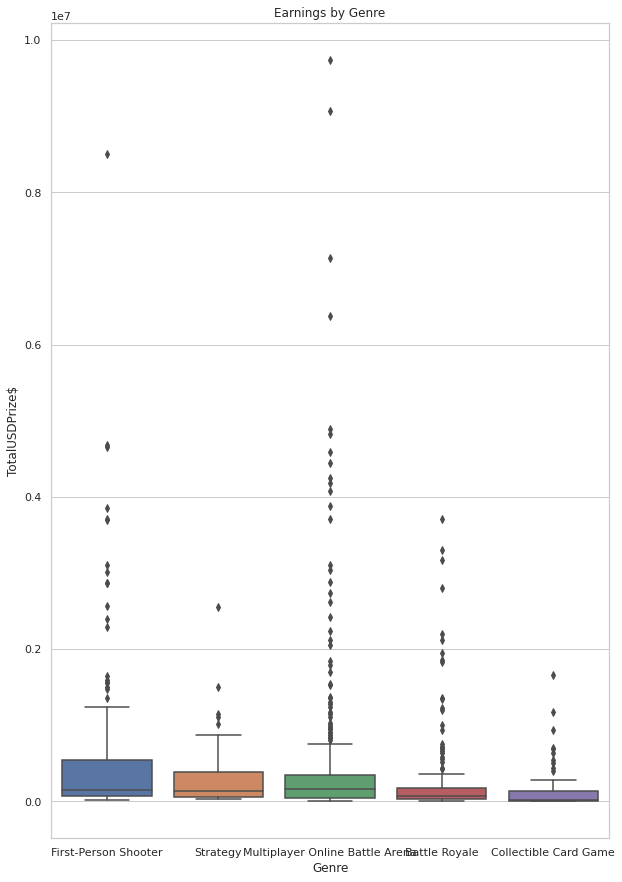

In [36]:
fig = plt.figure(figsize=(10,15))
box_plot = sns.boxplot(x='Genrex', y="TotalUSDPrize", data=tdf)
box_plot.set(title='Earnings by Genre', xlabel='Genre', ylabel='TotalUSDPrize$')

let us get a statistical description

In [37]:
stats = tdf[['TotalUSDPrize','Genre']].groupby(['Genre'])
stats.describe()

TotalUSDPrize                               \
                                        count           mean           std   
Genre                                                                        
Battle Royale                           200.0  256881.435000  5.684190e+05   
Collectible Card Game                    80.0  135806.387500  2.824000e+05   
First-Person Shooter                    200.0  526595.720000  1.004292e+06   
Multiplayer Online Battle Arena         348.0  878241.034483  2.937659e+06   
Strategy                                100.0  278561.000000  3.661821e+05   

                                                                         \
                                     min       25%       50%        75%   
Genre                                                                     
Battle Royale                     1200.0  29565.50   66771.5  177908.00   
Collectible Card Game              175.0   1900.00    9859.5  130582.00   
First-Person Shooter             20000.0  72708.00  143829.0  539064.00   
Multiplayer Online Battle Arena   2500.0  47164.50  165896.0  362724.75   
Strategy                         31490.0  61592.75  131583.0  387020.75   

                                             
                                        max  
Genre                                        
Battle Royale                     3708150.0  
Collectible Card Game             1656839.0  
First-Person Shooter              8503918.0  
Multiplayer Online Battle Arena  33810636.0  
Strategy                          2546572.0

## liner regression models for some of the features

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm

LinearRegression()

In [40]:
# How can the Team help us predict earnings
x = tdf[['TotalTournaments']]
y = tdf[['TotalUSDPrize']]
lm.fit(x,y)

LinearRegression()

In [41]:
# make a prediction
Yhat = lm.predict(x)
Yhat[0:5]

array([[388332.63126019],
       [425160.77687252],
       [455850.89821612],
       [437436.82540996],
       [382194.60699147]])

In [42]:
# Find the value of the interrcept (a)
lm.intercept_

array([345366.46137915])

In [43]:
# value of the slope (b)
lm.coef_

array([[6138.02426872]])

Linear model: Yhat = a + bx

*Earnings* = 34566.46 + 6138.02 * *number of tournaments*

## Model number of tournaments regression with only the strategy genre

In [44]:
# remove old condition
tdf['Genrex'] = tdf.Genre.where(tdf.TotalUSDPrize < 100000000000)

In [45]:
tdf['tourneyx'] = tdf.TotalTournaments.where(tdf.Genre == 'Strategy') #create columnn where tournament is only measured if it is of the stategy genre
strat_mod = tdf.dropna() # drop all rows that aren't of strategy genre
strat_mod

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,Genrex,tourneyx
100,181,Jin Air Green Wings,2546572,379,Starcraft II,Strategy,Strategy,379.0
101,102,Team Liquid,1498925,808,Starcraft II,Strategy,Strategy,808.0
102,145,SK Telecom T1,1143991,94,Starcraft II,Strategy,Strategy,94.0
103,131,Incredible Miracle,1111753,138,Starcraft II,Strategy,Strategy,138.0
104,136,StarTale,1014565,152,Starcraft II,Strategy,Strategy,152.0
...,...,...,...,...,...,...,...,...
195,125,PanDarea,34319,7,Starcraft II,Strategy,Strategy,7.0
196,320,SBENU,34211,28,Starcraft II,Strategy,Strategy,28.0
197,123,World Elite,33964,20,Starcraft II,Strategy,Strategy,20.0
198,816,O'Gaming,31870,44,Starcraft II,Strategy,Strategy,44.0


In [46]:
lm1 = LinearRegression()
lm1.fit(strat_mod[['tourneyx']], strat_mod[['TotalUSDPrize']])

LinearRegression()

In [47]:
# find the slope (b)
lm1.coef_

array([[1611.67644475]])

In [48]:
#find the intercept (a)
lm1.intercept_

array([74264.89386375])

equation:
*Earnings* = 74264.89 + 1611.78 * *Strategy-Tournament-amount*

We can now estimate the potential earnings based on the amount of tourneys for any given genre as well as the specific genre 'Strategy'

## correlation matrix
now to turn all features into numerical values so we can see a heatmap of correlations between features

In [49]:
tdf = pd.read_csv(r'../input/esports-earnings-for-players-teams-by-game/highest_earning_teams.csv')

In [50]:
tdf.corr()

,TeamId,TotalUSDPrize,TotalTournaments
TeamId,1.000000,-0.076652,-0.139735
TotalUSDPrize,-0.076652,1.000000,0.197059
TotalTournaments,-0.139735,0.197059,1.000000


In [51]:
df_numerized = tdf

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,334,3105000.0,7,7,2
1,776,208,1591136.5,13,7,2
2,768,247,1572618.5,18,7,2
3,773,286,1186278.5,15,7,2
4,766,339,1130000.0,6,7,2
...,...,...,...,...,...,...
923,24781,316,6286.8,2,0,3
924,261,18,4000.0,1,0,3
925,713,226,3429.6,1,0,3
926,608,53,2500.0,1,0,3


In [52]:
tdf.corr()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
TeamId,1.000000,-0.048258,-0.076652,-0.139735,-0.050385,-0.244951
TeamName,-0.048258,1.000000,0.015185,0.054399,-0.036530,0.007872
TotalUSDPrize,-0.076652,0.015185,1.000000,0.197059,-0.152215,0.090427
TotalTournaments,-0.139735,0.054399,0.197059,1.000000,0.175884,0.342676
Game,-0.050385,-0.036530,-0.152215,0.175884,1.000000,0.075302
Genre,-0.244951,0.007872,0.090427,0.342676,0.075302,1.000000


Text(30.499999999999993, 0.5, 'esport Features')

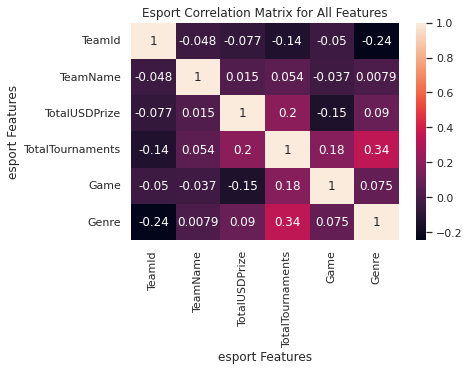

In [53]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Esport Correlation Matrix for All Features')
plt.xlabel('esport Features')
plt.ylabel('esport Features')

nothing significant